# Spotify x Billboard Five Year Analysis Project: Python Data Analysis

In-depth analyses including KMeans for grouping tracks by features, genre classification via KNN and Random Forest 

## Imports

### Packages

In [1]:
import json
import time
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from itertools import permutations
from tqdm import tqdm

### Settings

In [2]:
pd.set_option('display.max_columns', 75)

### Data

In [3]:
atacj = pd.read_csv('../data/AllTracksAndChartsJoined.csv')
atacj = atacj.drop("Unnamed: 0", axis=1)
atacj

playlist_id                  playlist_name  chart_position  \
0      3avCwQPH6DkhMTRsizon7N  Billboard 200 Top Albums 2021               1   
1      3avCwQPH6DkhMTRsizon7N  Billboard 200 Top Albums 2021               1   
2      3avCwQPH6DkhMTRsizon7N  Billboard 200 Top Albums 2021               1   
3      3avCwQPH6DkhMTRsizon7N  Billboard 200 Top Albums 2021               1   
4      3avCwQPH6DkhMTRsizon7N  Billboard 200 Top Albums 2021               1   
...                       ...                            ...             ...   
16496  1N9WQ0C6m7n1TVeLXdUoNb  Billboard 200 Top Albums 2017             200   
16497  1N9WQ0C6m7n1TVeLXdUoNb  Billboard 200 Top Albums 2017             200   
16498  1N9WQ0C6m7n1TVeLXdUoNb  Billboard 200 Top Albums 2017             200   
16499  1N9WQ0C6m7n1TVeLXdUoNb  Billboard 200 Top Albums 2017             200   
16500  1N9WQ0C6m7n1TVeLXdUoNb  Billboard 200 Top Albums 2017             200   

      album_release_date  release_year release_date_datetime  \
0             2021-01-08          2021            2021-01-08   
1             2021-01-08          2021            2021-01-08   
2             2021-01-08          2021            2021-01-08   
3             2021-01-08          2021            2021-01-08   
4             2021-01-08          2021            2021-01-08   
...                  ...           ...                   ...   
16496         2017-06-09          2017            2017-06-09   
16497         2017-06-09          2017            2017-06-09   
16498         2017-06-09          2017            2017-06-09   
16499         2017-06-09          2017            2017-06-09   
16500         2017-06-09          2017            2017-06-09   

                     album_id   album_artist                track_name  \
0      1qW1C4kDOXnrly22daHbxz  Morgan Wallen          Sand In My Boots   
1      1qW1C4kDOXnrly22daHbxz  Morgan Wallen             Wasted On You   
2      1qW1C4kDOXnrly22daHbxz  Morgan Wallen        Somebody’s Problem   
3      1qW1C4kDOXnrly22daHbxz  Morgan Wallen    More Surprised Than Me   
4      1qW1C4kDOXnrly22daHbxz  Morgan Wallen                       865   
...                       ...            ...                       ...   
16496  4WZZDzGqjvw4bRwrp56U24         Lady A  Big Love In A Small Town   
16497  4WZZDzGqjvw4bRwrp56U24         Lady A                 The Stars   
16498  4WZZDzGqjvw4bRwrp56U24         Lady A             Teenage Heart   
16499  4WZZDzGqjvw4bRwrp56U24         Lady A                      Home   
16500  4WZZDzGqjvw4bRwrp56U24         Lady A                    Famous   

                     track_id  track_popularity      track_artists  \
0      4qeMbs55QlONyrE9YBMA93                42  ['Morgan Wallen']   
1      4xv9BDq764NSKG3geku9X2                42  ['Morgan Wallen']   
2      7cWMnSxmQfKFsIIoRWifbb                35  ['Morgan Wallen']   
3      6Mn2GFiNNadK0G2ZXRK1fd                35  ['Morgan Wallen']   
4      3lb2f27695Iuyd82khwU9k                38  ['Morgan Wallen']   
...                       ...               ...                ...   
16496  1VwuDXLQdyTWvieBIPWkNt                36         ['Lady A']   
16497  2gFkkpMs7rakuCCi9UepP0                37         ['Lady A']   
16498  7G2BnhS46nEiPucLNvE0G3                35         ['Lady A']   
16499  32zF5eXrb8QrUu5qNdYmIO                35         ['Lady A']   
16500  5xeo7Mr6638HYaEontltHV                34         ['Lady A']   

                track_artists_ids  \
0      ['4oUHIQIBe0LHzYfvXNW4QM']   
1      ['4oUHIQIBe0LHzYfvXNW4QM']   
2      ['4oUHIQIBe0LHzYfvXNW4QM']   
3      ['4oUHIQIBe0LHzYfvXNW4QM']   
4      ['4oUHIQIBe0LHzYfvXNW4QM']   
...                           ...   
16496  ['32WkQRZEVKSzVAAYqukAEA']   
16497  ['32WkQRZEVKSzVAAYqukAEA']   
16498  ['32WkQRZEVKSzVAAYqukAEA']   
16499  ['32WkQRZEVKSzVAAYqukAEA']   
16500  ['32WkQRZEVKSzVAAYqukAEA']   

                                    track_artists_genres  \
0                               ['contemporary countr

#### Create dataframe of features for analysis

In [4]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']
features_df = atacj[columns]

#### Scaling the data

In [14]:
for col in ['loudness', 'tempo', 'key', 'time_signature']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))
scaled_data = features_df 
scaled_df = features_df

<ipython-input-14-ea5a454ed97b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Full Size Tree of Genre Classifcation Using Random Forest

#### Select the features to target

In [15]:
atacj['target'] = atacj['main_genre']

In [16]:
X = features_df

In [17]:
y = atacj.target
%store X

Stored 'X' (DataFrame)


In [18]:
%store y

Stored 'y' (Series)


In [19]:
%store -r X

In [20]:
%store -r y

In [21]:
y.head()

0    Country
1    Country
2    Country
3    Country
4    Country
Name: target, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=3)

Best random search:

#### Visualize a tree from the forest at a high resolution with wider spacing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=3)
forest_random_viz = RandomForestClassifier(n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth= 100, bootstrap=False)
forest_random_viz.fit(X_train, y_train)

In [26]:
forest_random_viz.score(X_test, y_test)

0.8192284386992527

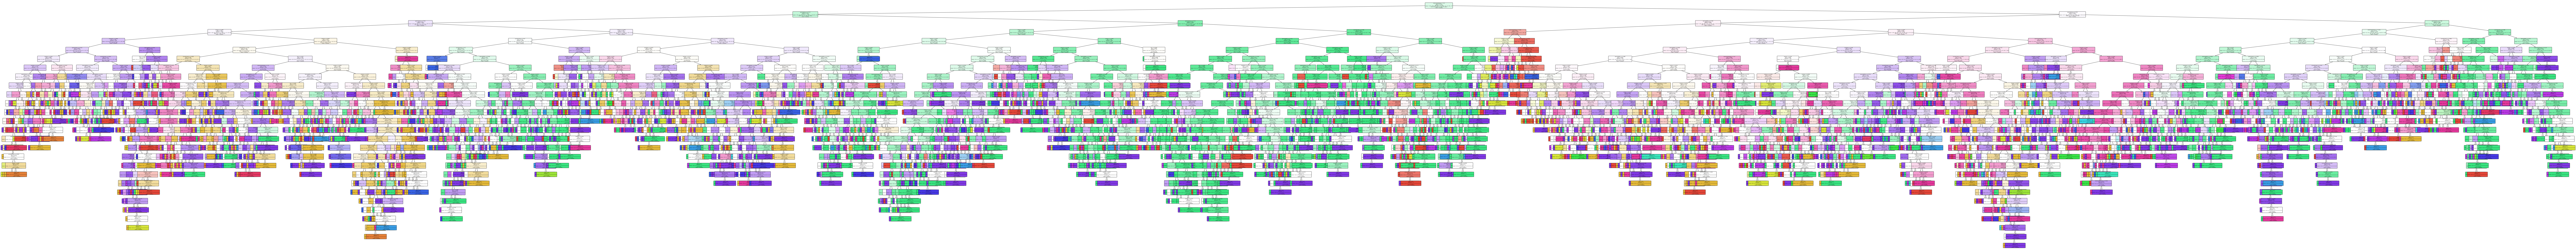

In [28]:
plt.figure(figsize=(300,30))
plot_tree(forest_random_viz.estimators_[5], 
          feature_names = scaled_df.columns,
          class_names = atacj['target'],
          filled=True, impurity=True, 
          rounded=True, fontsize=6)
plt.savefig('../viz/pyplots/full_example_tree_plot_hi_res.png', dpi=100)
